In [1]:
import pandas as pd
import numpy as np
from IPython.display import clear_output

path_tr = '/content/drive/MyDrive/CommonLit/input/train.csv'
path_test = '/content/drive/MyDrive/CommonLit/input/test.csv'
path_sub = '/content/drive/MyDrive/CommonLit/input/sample_submission.csv'

# Description
**Task:** To build algorithms to rate the complexity of reading passages for grade 3-12 classroom use.

**Data**
> train/tets
> - id  - uniques
> - url  - source txt
> - license - license source txt
> - excerpt - text
> - target - reading ease (легкость чтения)
> - standard_error - measure of spread of scores among multiple raters for each excerpt. Not included for test data (мера разброса оценок между несколькими оценщиками для каждого отрывка)

**Metric**

$$RMSE = \sqrt{\frac{1}{n}}{\sum_{i=1}^n(y_i - \hat{y_i})^2}$$

# Data

In [2]:
df = pd.read_csv(path_tr)
df.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [3]:
pd.read_csv(path_test).head()

,id,url_legal,license,excerpt
0,c0f722661,NaN,NaN,My hope lay in Jack's promise that he would ke...
1,f0953f0a5,NaN,NaN,Dotty continued to go to Mrs. Gray's every nig...
2,0df072751,NaN,NaN,It was a bright and cheerful scene that greete...
3,04caf4e0c,https://en.wikipedia.org/wiki/Cell_division,CC BY-SA 3.0,Cell division is the process by which a parent...
4,0e63f8bea,https://en.wikipedia.org/wiki/Debugging,CC BY-SA 3.0,Debugging is the process of finding and resolv...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2834 non-null   object 
 1   url_legal       830 non-null    object 
 2   license         830 non-null    object 
 3   excerpt         2834 non-null   object 
 4   target          2834 non-null   float64
 5   standard_error  2834 non-null   float64
dtypes: float64(2), object(4)
memory usage: 133.0+ KB


# Simple preprocessing

In [4]:
import re
import seaborn as sns
import matplotlib.pyplot as plt
# from termcolorn import colored

In [7]:
def clean_text(txt):
    return re.sub('[^A-Za-z]+', ' ',str(txt).lower())
txt = df.excerpt[0]
txt

'When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThese rugs were for prizes, one for the girls and one for the boys. And this was the game.\nThe girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole.\nThis would have been an easy matter, but each traveller was obliged to wear snowshoes.'

In [8]:
clean_text(txt)

'when the young people returned to the ballroom it presented a decidedly changed appearance instead of an interior scene it was a winter landscape the floor was covered with snow white canvas not laid on smoothly but rumpled over bumps and hillocks like a real snow field the numerous palms and evergreens that had decorated the room were powdered with flour and strewn with tufts of cotton like snow also diamond dust had been lightly sprinkled on them and glittering crystal icicles hung from the branches at each end of the room on the wall hung a beautiful bear skin rug these rugs were for prizes one for the girls and one for the boys and this was the game the girls were gathered at one end of the room and the boys at the other and one end was called the north pole and the other the south pole each player was given a small flag which they were to plant on reaching the pole this would have been an easy matter but each traveller was obliged to wear snowshoes '

# EDA


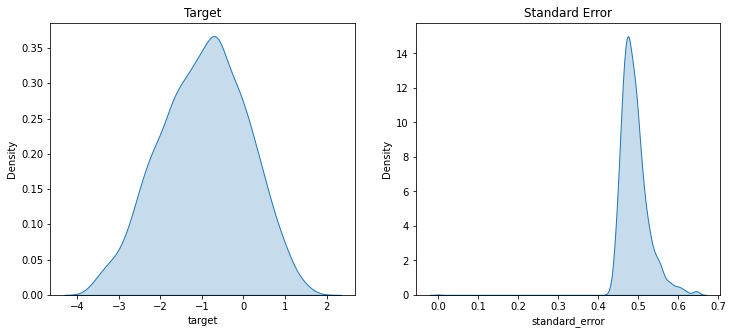

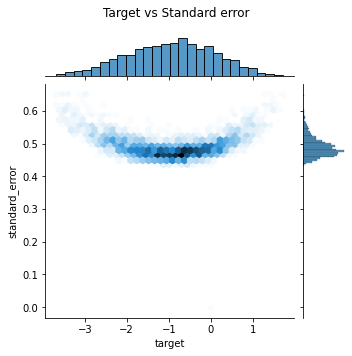

In [10]:
fig, ax = plt.subplots(1,2,figsize=(12, 5))
sns.kdeplot(
    df['target'],
    shade = True,
    ax = ax[0]
)
sns.kdeplot(
    df['standard_error'],
    shade = True,
    ax = ax[1]
)
ax[0].set_title("Target")
ax[1].set_title("Standard Error")
plt.show()
sns.jointplot(x=df['target'],
              y=df['standard_error'],
              kind='hex',
              height=5,
              )
plt.suptitle("Target vs Standard error")
plt.subplots_adjust(top=0.90)

plt.show()

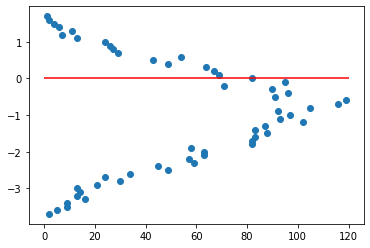

In [14]:
 a = df.target.round(1).value_counts()
 plt.scatter(x=a.values, y=a.index)
 plt.hlines([0], xmin=0, xmax=120, color='red')


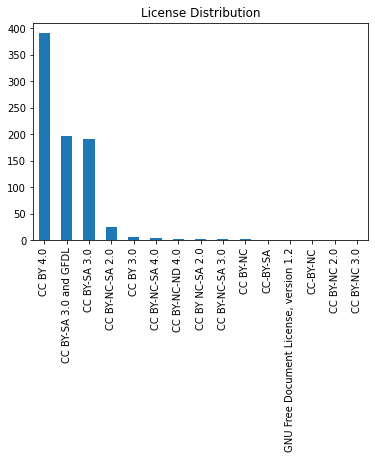

In [20]:
df.license.value_counts().plot(kind='bar')
plt.title("License Distribution")
plt.show()

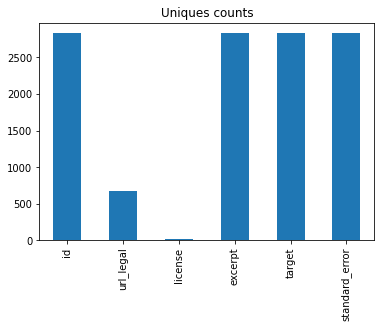

In [23]:
df.nunique().plot(kind='bar')
plt.title("Uniques counts")
plt.show()

In [30]:
df['txt_len'] = df.excerpt.apply(lambda x: len(x))
df['words_len'] = df.excerpt.str.split().apply(lambda x: len(x))
df.head(2)

,id,url_legal,license,excerpt,target,standard_error,txt_len,words_len
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,992,179
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,937,169


In [ ]:
count words in txt vs target
len txt vs target
find most counted words
urls what sourse 
wath is diff